In [131]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
data = pd.read_csv('E:\\Python\\STPY-26\\STPY_HW4\\water.csv')

In [133]:
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


##  Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

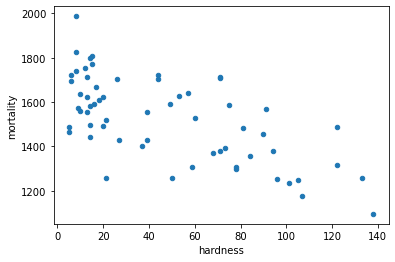

In [134]:
data.plot(kind='scatter', x='hardness', y='mortality')

In [135]:
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [136]:
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [138]:
X = data[['hardness']]
y = data['mortality']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [140]:
X_train.shape

(42, 1)

In [141]:
y_train.shape

(42,)

In [142]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [143]:
model.coef_

array([-3.50616562])

In [144]:
model.intercept_

1693.1651163336157

In [145]:
y_pred = model.predict(X_test)
y_pred

array([1538.89382905, 1265.41291069, 1644.07879765, 1623.04180393,
       1444.22735731, 1665.11579137, 1325.01772623, 1619.53563831,
       1658.10346013, 1637.06646641, 1493.31367599, 1640.57263203,
       1658.10346013, 1647.58496327, 1598.49864459, 1644.07879765,
       1602.00481021, 1675.63428823, 1339.04238871])

In [146]:
model.score(X_test, y_test) 

0.2983823598635743

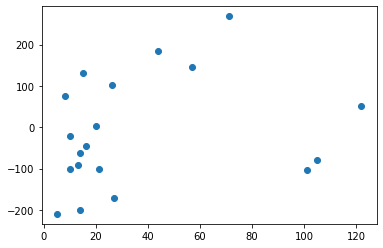

In [175]:
plt.scatter(X_test, y_test - y_pred)

(array([3., 0., 5., 3., 1., 2., 1., 2., 1., 1.]),
 array([-209.63428823, -161.79359514, -113.95290205,  -66.11220896,
         -18.27151587,   29.56917723,   77.40987032,  125.25056341,
         173.0912565 ,  220.9319496 ,  268.77264269]),
 <BarContainer object of 10 artists>)

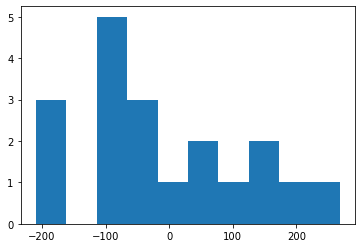

In [178]:
plt.hist(y_test - y_pred)

## Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [148]:
data_north = (data.loc[data.location == 'North'])

In [149]:
data_south = (data.loc[data.location == 'South'])

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

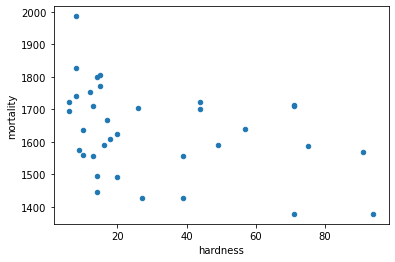

In [150]:
data_north.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

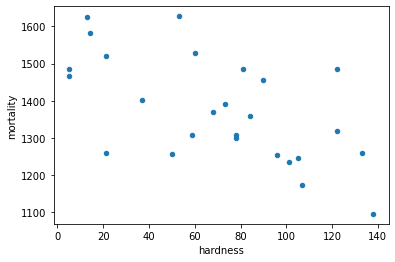

In [151]:
data_south.plot(kind='scatter', x='hardness', y='mortality')

In [152]:
data_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [153]:
data_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [154]:
data_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [155]:
data_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [156]:
Xn = data_north[['hardness']]
yn = data_north['mortality']

In [157]:
Xs = data_south[['hardness']]
ys = data_south['mortality']

In [158]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.30)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.30)

In [159]:
Xn_train.shape

(24, 1)

In [160]:
Xs_train.shape

(18, 1)

In [161]:
yn_train.shape

(24,)

In [162]:
ys_train.shape

(18,)

In [163]:
model_north = LinearRegression()
model_north.fit(Xn_train, yn_train)

LinearRegression()

In [164]:
model_south = LinearRegression()
model_south.fit(Xs_train, ys_train)

LinearRegression()

In [165]:
model_north.coef_

array([-2.32983587])

In [166]:
model_south.coef_

array([-2.09081213])

In [167]:
model_north.intercept_

1717.980595279309

In [168]:
model_south.intercept_

1528.830912488708

In [169]:
yn_pred = model_north.predict(Xn_test)
yn_pred

array([1685.36289313, 1678.37338553, 1694.6822366 , 1552.56224868,
       1699.34190834, 1655.07502685, 1505.96553132, 1676.04354966,
       1657.40486272, 1552.56224868, 1704.00158007])

In [170]:
ys_pred = model_south.predict(Xs_test)
ys_pred

array([1317.65888732, 1484.92385775, 1499.55954266, 1518.37685184,
       1365.74756632, 1501.65035479, 1309.2956388 , 1340.65782076])

In [171]:
model_north.score(Xn_test, yn_test) 

-0.12335587445789065

In [172]:
model_south.score(Xs_test, ys_test) 

0.3949054308935357

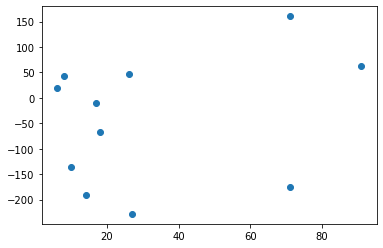

In [176]:
plt.scatter(Xn_test, yn_test - yn_pred)

(array([2., 1., 1., 0., 1., 1., 2., 2., 0., 1.]),
 array([-228.07502685, -189.22374903, -150.37247122, -111.5211934 ,
         -72.66991558,  -33.81863776,    5.03264005,   43.88391787,
          82.73519569,  121.58647351,  160.43775132]),
 <BarContainer object of 10 artists>)

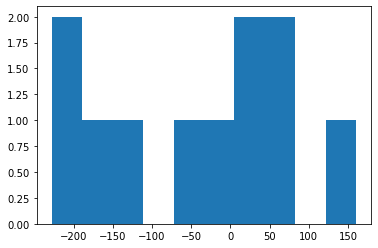

In [179]:
plt.hist(yn_test - yn_pred)

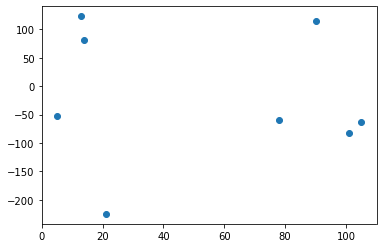

In [177]:
plt.scatter(Xs_test, ys_test - ys_pred)

(array([1., 0., 0., 0., 4., 0., 0., 0., 1., 2.]),
 array([-224.92385775, -190.09650746, -155.26915716, -120.44180686,
         -85.61445657,  -50.78710627,  -15.95975598,   18.86759432,
          53.69494461,   88.52229491,  123.34964521]),
 <BarContainer object of 10 artists>)

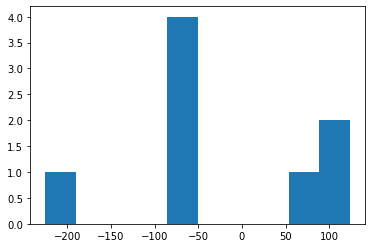

In [180]:
plt.hist(ys_test - ys_pred)